In [20]:
from functions import *
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
from optparse import OptionParser
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

%matplotlib inline

#min_max_scaler = MinMaxScaler()
n_iter = 100

chunk = 'S9'
print (chunk)

data, labels, unique_mutations[chunk], aa_seq, mut_list = read_data_all_positions(chunk)

print 'Splitting the data'
x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.01)

n_neurons = []

mse_val = []
mse_train = []
r_val=[]
r_train=[]

r2_weights = []

for i in range(1,22,4):
    
    print '\nNumber of weights combinations = ', i
    temp_mse_train_list=[]
    temp_mse_val_list=[]
    temp_r_train_list=[]
    temp_r_val_list=[]
    temp_weights_r2={}
    it=0
    loop_count=10
    
    while it<loop_count and loop_count<100:
        print it
        model = Sequential()

        model.add(Dense(i,input_dim=data.shape[1],activation='sigmoid',kernel_initializer='glorot_normal'))
        model.add(Dense(20,activation='sigmoid'))
        model.add(Dense(1,activation='relu'))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
        
        early_stopping_monitor=EarlyStopping(patience=10)
        
        model.compile(optimizer=opt,
                      loss='mean_squared_error')

        hist = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                                epochs=n_iter, batch_size=500, shuffle=True, callbacks=[early_stopping_monitor],verbose=1)

        proba = model.predict_proba(x_valid, batch_size=500,verbose=0)
        predicted_val = proba.flatten()

        proba = model.predict_proba(x_train, batch_size=500,verbose=0)
        predicted_train = proba.flatten()
        
        weights = model.layers[0].get_weights()[0]
        
        temp_mse_val = mean_squared_error(y_valid,predicted_val)
        temp_mse_train = mean_squared_error(y_train,predicted_train)
        temp_r_val = pearsonr(y_valid,predicted_val)[0]
        temp_r_train = pearsonr(y_train,predicted_train)[0]
        
        it+=1
        
        #Sanity checks
        if temp_mse_val<0.1:
            temp_mse_val_list.append(temp_mse_val)
            temp_mse_train_list.append(temp_mse_train)
            temp_r_val_list.append(temp_r_val)
            temp_r_train_list.append(temp_r_train)
            
            for combination in list(itertools.combinations([x for x in range(i)], 2)):
                if combination in temp_weights_r2:
                    temp_weights_r2[combination].extend([spearmanr(weights[:,combination[0]],weights[:,combination[1]])])
                else:
                    temp_weights_r2[combination] = [spearmanr(weights[:,combination[0]],weights[:,combination[1]])]
                    
        else:
            loop_count+=1
                    
                    
    n_neurons.append(i)
    mse_val.append(temp_mse_val_list)
    mse_train.append(temp_mse_train_list)
    r_val.append(temp_r_val_list)
    r_train.append(temp_r_train_list)
    
    if i>1:
        r2_weights.append([np.median(temp_weights_r2[x]) for x in temp_weights_r2])

S9
Splitting the data

Number of weights combinations =  1
0
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.2555 - val_loss: 0.2298
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2290 - val_loss: 0.2361
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2275 - val_loss: 0.2286
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2261 - val_loss: 0.2229
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2244 - val_loss: 0.2220
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2249 - val_loss: 0.2234
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2217 - val_loss: 0.2215
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2261 - val_loss: 0.2258
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2231 - val_loss: 0.2215
Epoch 10/100
16682/16682 [=

16682/16682 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2284
Epoch 23/100
16682/16682 [==============================] - 0s - loss: 0.2217 - val_loss: 0.2207
Epoch 24/100
16682/16682 [==============================] - 0s - loss: 0.2233 - val_loss: 0.2206
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2259
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2210 - val_loss: 0.2240
Epoch 27/100
16682/16682 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2499
Epoch 28/100
16682/16682 [==============================] - 0s - loss: 0.2223 - val_loss: 0.2209
Epoch 29/100
16682/16682 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2204
Epoch 30/100
16682/16682 [==============================] - 0s - loss: 0.2210 - val_loss: 0.2256
Epoch 31/100
16682/16682 [==============================] - 0s - loss: 0.2218 - val_loss: 0.2436
Epoch 32/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2236
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2206
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2213 - val_loss: 0.2234
Epoch 21/100
16682/16682 [==============================] - 0s - loss: 0.2227 - val_loss: 0.2207
Epoch 22/100
16682/16682 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2469
Epoch 23/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2206
Epoch 24/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2205
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2310
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2221 - val_loss: 0.2205
Epoch 27/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2286
Epoch 28/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2365
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2213 - val_loss: 0.2249
10
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680


16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
14
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.368

16682/16682 [==============================] - 0s - loss: 0.2228 - val_loss: 0.2579
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2217 - val_loss: 0.2236
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2228 - val_loss: 0.2214
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2215
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.2212 - val_loss: 0.2205
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2269
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2233
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2434
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2337
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2223 - val_loss: 0.2229
19
Train on 16682 samples, validate on 169 sam

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 16/100
16682/16682 [====================

16682/16682 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2242
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2219 - val_loss: 0.2222
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2213 - val_loss: 0.2216
Epoch 17/100
16682/16682 [==============================] - 0s - loss: 0.2210 - val_loss: 0.2495
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2221 - val_loss: 0.2213
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2288
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2206 - val_loss: 0.2255
Epoch 21/100
16682/16682 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2231
8
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.2527 - val_loss: 0.2301
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2282 - val_loss: 0.

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
14
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.368

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
20
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.2350 - val_loss: 0.2638
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2285 - val_loss: 0.2283
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2260 - val_loss: 0.2288
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2253 - val_loss: 0.2218
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2246 - val_loss: 0.2379
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2241 - val_loss: 0.2390
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2253 - val_loss: 0.2235

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
26
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.368

16682/16682 [==============================] - 0s - loss: 0.2208 - val_loss: 0.2214
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2201 - val_loss: 0.2278
29
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680


16682/16682 [==============================] - 0s - loss: 0.2240 - val_loss: 0.2372
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2208
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.2222 - val_loss: 0.2593
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.2236 - val_loss: 0.2204
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2201
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2217 - val_loss: 0.2226
Epoch 17/100
16682/16682 [==============================] - 0s - loss: 0.2227 - val_loss: 0.2217
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2218 - val_loss: 0.2233
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2229 - val_loss: 0.2295
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2246
Epoch 21/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680ss: 0.34
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
5
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
8
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
12
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
E

16682/16682 [==============================] - 0s - loss: 0.2255 - val_loss: 0.2240
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2246 - val_loss: 0.2218
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2229 - val_loss: 0.2241
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.2236 - val_loss: 0.2269
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2212
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.2233 - val_loss: 0.2285
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.2211 - val_loss: 0.2246
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2252
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2343
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2220 - val_loss: 0.2242
Epoch 17/100
16682/16682 [===================

16682/16682 [==============================] - 0s - loss: 0.2177 - val_loss: 0.2235

Number of weights combinations =  13
0
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680ss: 0.33
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
6
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss

16682/16682 [==============================] - 0s - loss: 0.2212 - val_loss: 0.2226
Epoch 27/100
16682/16682 [==============================] - 0s - loss: 0.2205 - val_loss: 0.2289
11
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680


16682/16682 [==============================] - 0s - loss: 0.2187 - val_loss: 0.2186
Epoch 24/100
16682/16682 [==============================] - 0s - loss: 0.2183 - val_loss: 0.2188
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2188 - val_loss: 0.2229
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2182 - val_loss: 0.2396
Epoch 27/100
16682/16682 [==============================] - 0s - loss: 0.2183 - val_loss: 0.2288
Epoch 28/100
16682/16682 [==============================] - 0s - loss: 0.2184 - val_loss: 0.2211
Epoch 29/100
16682/16682 [==============================] - 0s - loss: 0.2180 - val_loss: 0.2191
Epoch 30/100
16682/16682 [==============================] - 0s - loss: 0.2182 - val_loss: 0.2195
Epoch 31/100
16682/16682 [==============================] - 0s - loss: 0.2176 - val_loss: 0.2207
Epoch 32/100
16682/16682 [==============================] - 0s - loss: 0.2180 - val_loss: 0.2194
Epoch 33/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.2211 - val_loss: 0.2233
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2197
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2206 - val_loss: 0.2208
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2208 - val_loss: 0.2260
Epoch 21/100
16682/16682 [==============================] - 0s - loss: 0.2202 - val_loss: 0.2215
Epoch 22/100
16682/16682 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2210
Epoch 23/100
16682/16682 [==============================] - 0s - loss: 0.2198 - val_loss: 0.2241
Epoch 24/100
16682/16682 [==============================] - 0s - loss: 0.2201 - val_loss: 0.2219
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2211 - val_loss: 0.2208
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2188 - val_loss: 0.2500
Epoch 27/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [========================

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
3
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.2391 - val_loss: 0.2300
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2293 - val_loss: 0.2282
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2272 - val_loss: 0.2758
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2257 - val_loss: 0.2227
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2249 - val_loss: 0.2369
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2248 - val_loss: 0.2312

16682/16682 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2621
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.2239 - val_loss: 0.2469ss: 0.223
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2246
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2257
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2235
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2212 - val_loss: 0.2208
Epoch 17/100
16682/16682 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2310
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2200 - val_loss: 0.2236
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2208 - val_loss: 0.2207
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2207 - val_loss: 0.2203
Epoch 21/100
16682/16682 [========

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
11
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.3356 - val_loss: 0.368

16682/16682 [==============================] - 0s - loss: 0.2190 - val_loss: 0.2227
Epoch 24/100
16682/16682 [==============================] - 0s - loss: 0.2194 - val_loss: 0.2321
Epoch 25/100
16682/16682 [==============================] - 0s - loss: 0.2192 - val_loss: 0.2313
Epoch 26/100
16682/16682 [==============================] - 0s - loss: 0.2194 - val_loss: 0.2202
Epoch 27/100
16682/16682 [==============================] - 0s - loss: 0.2182 - val_loss: 0.2218
Epoch 28/100
16682/16682 [==============================] - 0s - loss: 0.2186 - val_loss: 0.2227
Epoch 29/100
16682/16682 [==============================] - 0s - loss: 0.2182 - val_loss: 0.2264
Epoch 30/100
16682/16682 [==============================] - 0s - loss: 0.2181 - val_loss: 0.2363
Epoch 31/100
16682/16682 [==============================] - 0s - loss: 0.2174 - val_loss: 0.2375
Epoch 32/100
16682/16682 [==============================] - 0s - loss: 0.2180 - val_loss: 0.2238
16
Train on 16682 samples, validate on 169 

16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2261
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2308
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2211 - val_loss: 0.2274
Epoch 17/100
16682/16682 [==============================] - 0s - loss: 0.2208 - val_loss: 0.2439
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2212 - val_loss: 0.2237
Epoch 19/100
16682/16682 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2206
Epoch 20/100
16682/16682 [==============================] - 0s - loss: 0.2200 - val_loss: 0.2380
Epoch 21/100
16682/16682 [==============================] - 0s - loss: 0.2200 - val_loss: 0.2255
Epoch 22/100
16682/16682 [==============================] - 0s - loss: 0.2192 - val_loss: 0.2209
Epoch 23/100
16682/16682 [==============================] - 0s - loss: 0.2191 - val_loss: 0.2248
21
Train on 16682 samples, validate on 169 

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
1
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 3s - loss: 0.2604 - val_loss: 0.3360
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2378 - val_loss: 0.2264
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2315 - val_loss: 0.2534
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2278 - val_loss: 0.2324
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2283 - val_loss: 0.2510
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2265 - val_loss: 0.2264
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2261 - val_loss: 0.2339
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2253 - val_loss: 0.2222
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2252 - val_loss: 0.2247
Ep

16682/16682 [==============================] - 0s - loss: 0.2243 - val_loss: 0.2213
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.2227 - val_loss: 0.2349
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.2243 - val_loss: 0.2240
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.2215 - val_loss: 0.2207
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.2237 - val_loss: 0.2403
Epoch 14/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2457
Epoch 15/100
16682/16682 [==============================] - 0s - loss: 0.2229 - val_loss: 0.2205
Epoch 16/100
16682/16682 [==============================] - 0s - loss: 0.2225 - val_loss: 0.2220
Epoch 17/100
16682/16682 [==============================] - 0s - loss: 0.2210 - val_loss: 0.2264
Epoch 18/100
16682/16682 [==============================] - 0s - loss: 0.2224 - val_loss: 0.2379
Epoch 19/100
16682/16682 [=================

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
10
Train on 16682 samples, validate on 169 samples
Epoch 1/100
16682/16682 [==============================] - 4s - loss: 0.3390 - val_loss: 0.3680
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680

16682/16682 [==============================] - 4s - loss: 0.2525 - val_loss: 0.2949
Epoch 2/100
16682/16682 [==============================] - 0s - loss: 0.2355 - val_loss: 0.2267
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2293 - val_loss: 0.2466
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2279 - val_loss: 0.2231
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2261 - val_loss: 0.2244
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2242 - val_loss: 0.2276
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2255 - val_loss: 0.2407
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2245 - val_loss: 0.2285
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2244 - val_loss: 0.2219
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.2237 - val_loss: 0.2211
Epoch 11/100
16682/16682 [=========================

16682/16682 [==============================] - 0s - loss: 0.2326 - val_loss: 0.2263
Epoch 3/100
16682/16682 [==============================] - 0s - loss: 0.2310 - val_loss: 0.2293
Epoch 4/100
16682/16682 [==============================] - 0s - loss: 0.2280 - val_loss: 0.2249
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.2279 - val_loss: 0.2319
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.2264 - val_loss: 0.2365
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.2260 - val_loss: 0.2484
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.2260 - val_loss: 0.2362
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.2245 - val_loss: 0.2219
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.2243 - val_loss: 0.2274
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.2228 - val_loss: 0.2267
Epoch 12/100
16682/16682 [========================

16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 5/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 6/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 7/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 8/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 9/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 10/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 11/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 12/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 13/100
16682/16682 [==============================] - 0s - loss: 0.3390 - val_loss: 0.3680
Epoch 14/100
16682/16682 [======================

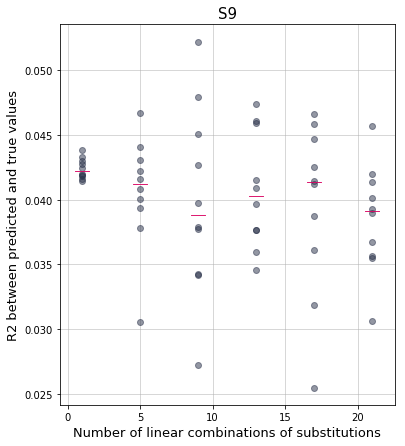

In [21]:

plt.figure(figsize=[6,7])
for i,r_list in enumerate(r_val):
    plt.plot([i*4+1]*len(r_list),[float(x)**2 for x in r_list],'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median([float(x)**2 for x in r_list])]*2,'-',lw=0.9,color='#DA0463')
plt.grid('--k',lw=0.5)
plt.title(chunk,fontsize=15)
plt.ylabel('R2 between predicted and true values',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/r_'+chunk+'.pdf')

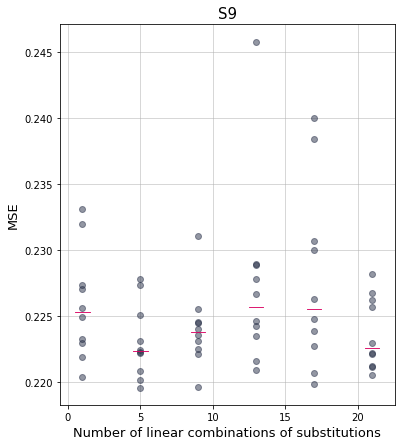

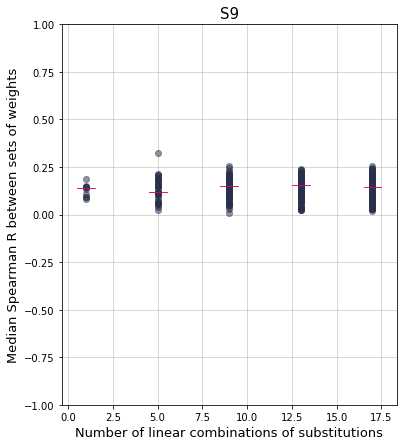

In [22]:
plt.figure(figsize=[6,7])
for i,mse_list in enumerate(mse_val):
    plt.plot([i*4+1]*len(mse_list),mse_list,'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median(mse_list)]*2,'-',lw=0.9,color='#DA0463')
plt.grid('--k',lw=0.5)
plt.title(chunk,fontsize=15)
plt.ylabel('MSE',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/mse_'+chunk+'.pdf')

plt.figure(figsize=[6,7])
for i,r2_list in enumerate(r2_weights):
    plt.plot([i*4+1]*len(r2_list),r2_list,'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median(r2_list)]*2,'-',lw=0.9,color='#DA0463')
plt.ylim(-1,1)
plt.title(chunk,fontsize=15)
plt.grid('--k',lw=0.5)
plt.ylabel('Median Spearman R between sets of weights',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/r2_weights_'+chunk+'.pdf')

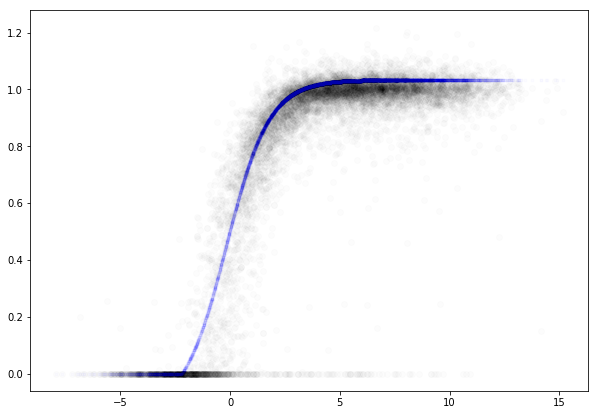

In [52]:
fitness_potential = x_train.dot(weights)+biases
plt.figure(figsize = [10,7])
plt.plot(fitness_potential[:10000], y_train[:10000], 'ok', alpha = 0.01);
plt.plot(fitness_potential[:10000], predicted_train[:10000], '.b', alpha = 0.01);

In [48]:
x=[]
y=[]
for i,l in enumerate(mse_val):

        x.extend([i*3+1]*len(l))
        y.extend(l)

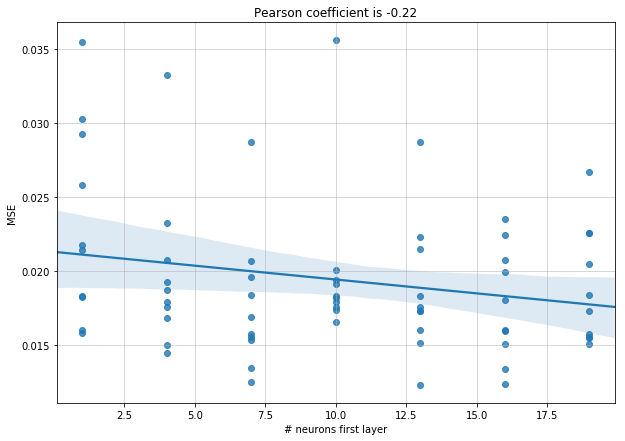

In [49]:
plt.figure(figsize=[10,7])
sns.regplot(x=np.array(x), y=np.array(y))
plt.grid('--k',lw=.5)
plt.ylabel('MSE')
plt.xlabel('# neurons first layer')
plt.title('Pearson coefficient is %.2f' % pearsonr(x,y)[0])